In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sac import calculate_sac

from gtda.homology import CubicalPersistence
import gtda.diagrams as dg

from gtda.plotting import plot_diagram, plot_heatmap

%load_ext autotime

import collections

In [2]:
activations = np.load('../data/activations4096.npy')

time: 4.9 ms


In [3]:
sacslist = []
for i in range(len(activations)):
    sacslist.append(calculate_sac(activations[i]))

sacs = np.stack(sacslist)

time: 36.8 s


In [4]:
masked_sacs = sacs[:,9:-9,9:-9]

time: 2.76 ms


In [5]:
persist = CubicalPersistence()
dgms = persist.fit_transform(-masked_sacs)

time: 5.3 s


In [6]:
pairdis = dg.PairwiseDistance('bottleneck', n_jobs=-1)
#distancesb = pairdis.fit_transform(dgms)

time: 3.24 ms


In [7]:
distances4096 = np.load('../data/bott_dist_4096.npy')

time: 383 ms


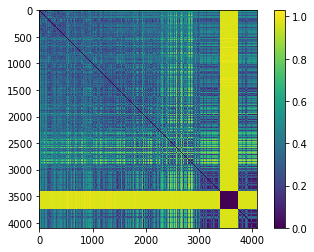

time: 506 ms


In [8]:
plt.imshow(distances4096)
plt.colorbar()

In [9]:
from sklearn.cluster import AgglomerativeClustering

time: 95.6 ms


In [10]:
model = AgglomerativeClustering(affinity='precomputed', linkage='complete', distance_threshold=None)

time: 601 µs


In [11]:
model.fit(distances4096)

AgglomerativeClustering(affinity='precomputed', linkage='complete')

time: 565 ms


In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward
import scipy.spatial.distance as ssd

time: 5.2 ms


In [13]:
Z = ward(distances4096)

time: 27.6 s


In [14]:
model5c = AgglomerativeClustering(n_clusters=5,affinity='precomputed', linkage='complete')
model5a = AgglomerativeClustering(n_clusters=5,affinity='precomputed', linkage='average')
model5s = AgglomerativeClustering(n_clusters=5,affinity='precomputed', linkage='single')
model4c = AgglomerativeClustering(n_clusters=4,affinity='precomputed', linkage='complete')
model4a = AgglomerativeClustering(n_clusters=4,affinity='precomputed', linkage='average')
model4s = AgglomerativeClustering(n_clusters=4,affinity='precomputed', linkage='single')

time: 1.34 ms


In [15]:
#my_models = [model3a,model3c,model3s,model4a,model4c,model4s]
my_models5 = [model5a,model5c,model5s]

time: 4.31 ms


In [16]:
for model in my_models5:
    model.fit(distances4096)
    labels = model.labels_
    dic = collections.Counter(labels)
    print(model)
    for keys in dic.keys():
        print(keys,':', dic[keys])
    print('-------------------')

AgglomerativeClustering(affinity='precomputed', linkage='average', n_clusters=5)
0 : 2944
1 : 326
4 : 237
2 : 266
3 : 323
-------------------
AgglomerativeClustering(affinity='precomputed', linkage='complete',
                        n_clusters=5)
0 : 2350
1 : 880
2 : 245
4 : 298
3 : 323
-------------------
AgglomerativeClustering(affinity='precomputed', linkage='single', n_clusters=5)
0 : 3770
3 : 1
4 : 1
2 : 1
1 : 323
-------------------
time: 1.32 s


In [19]:
labels = model5c.labels_
class0 = activations[np.where(labels==0)]
class1 = activations[np.where(labels==1)]
class2 = activations[np.where(labels==2)]
class3 = activations[np.where(labels==3)]
class4 = activations[np.where(labels==4)]

time: 12.2 ms


In [20]:
from visualize import plot_ratemaps

time: 3.46 s


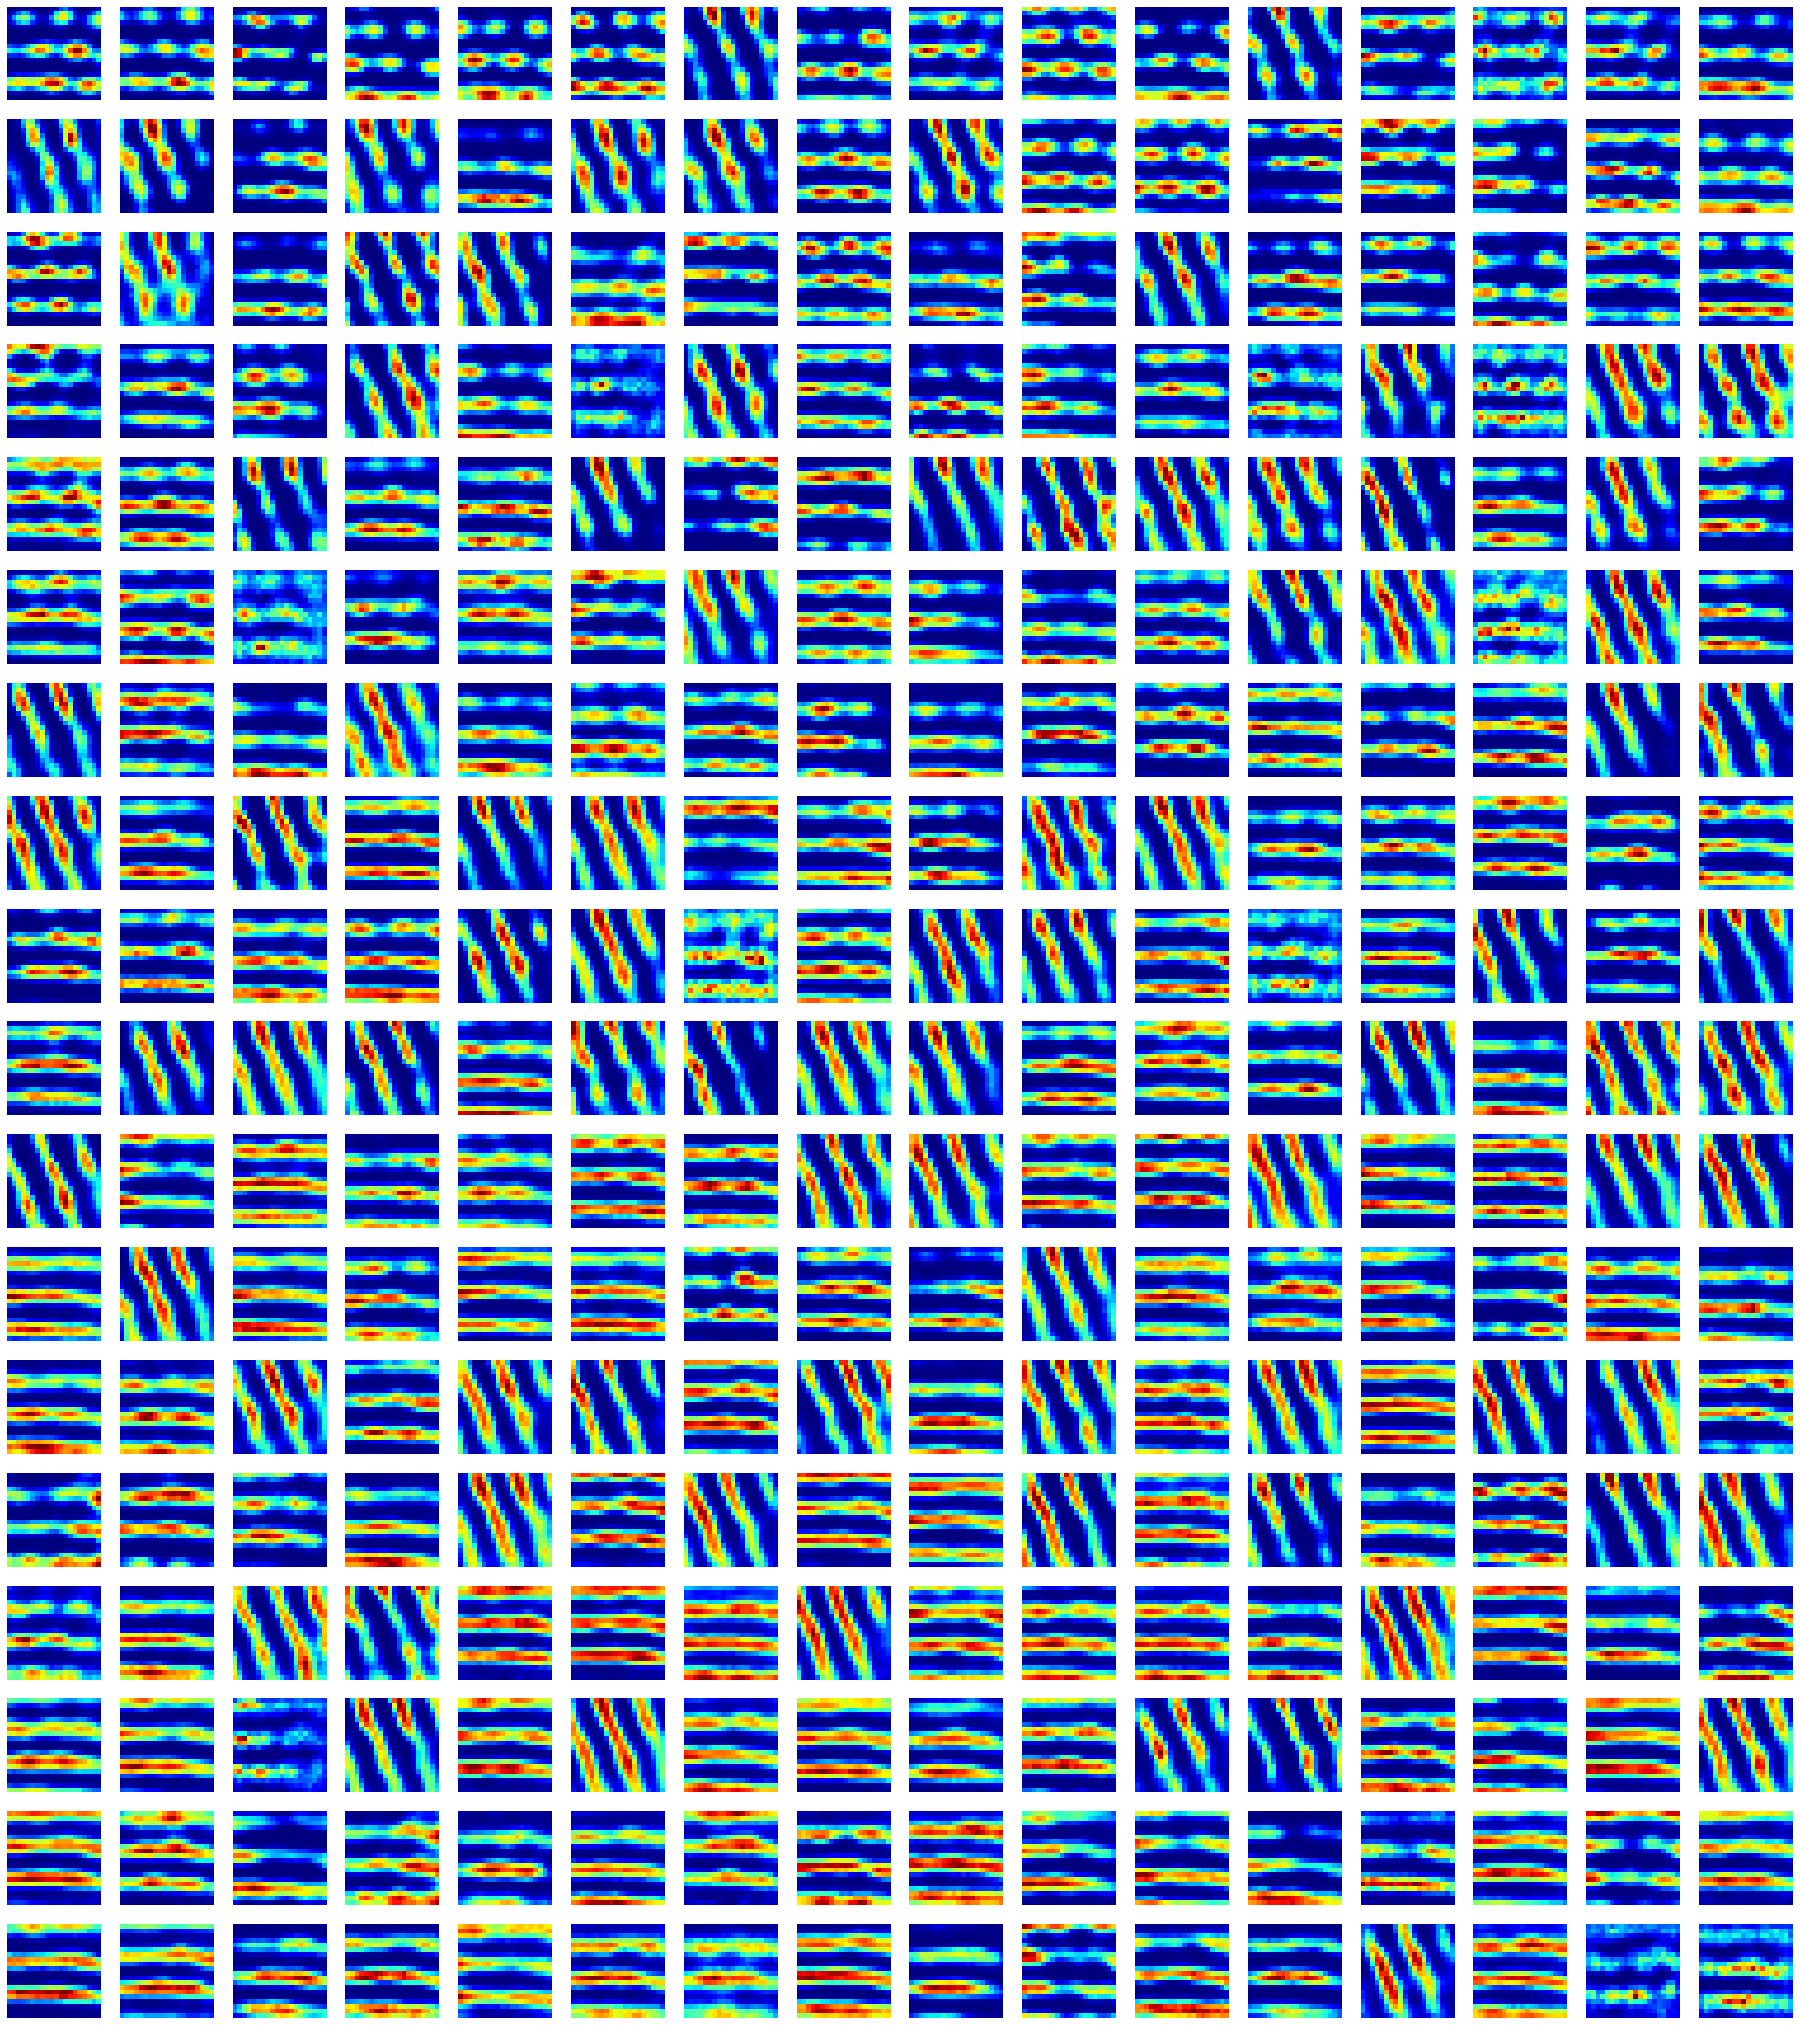

time: 906 ms


In [45]:
c = class4
n_plot = len(c)
plt.figure(figsize=(32,8*n_plot//8**2))
rm_fig = plot_ratemaps(c, n_plot, smooth=False)
plt.imshow(rm_fig)
plt.axis('off');

In [22]:
from sklearn.cluster import FeatureAgglomeration

time: 4.27 ms


In [23]:
modelf = FeatureAgglomeration(n_clusters = 4,affinity='precomputed',linkage='complete')

time: 2.13 ms


In [24]:
modelf.fit(distances4096)

FeatureAgglomeration(affinity='precomputed', linkage='complete', n_clusters=4)

time: 658 ms


In [25]:
labels = modelf.labels_
dic = collections.Counter(labels)

for keys in dic.keys():
    print(keys,':', dic[keys])

0 : 3301
1 : 151
2 : 321
3 : 323
time: 11.4 ms


In [26]:
modelfa = FeatureAgglomeration(n_clusters=4, affinity='precomputed',linkage='average')
modelfa.fit(distances4096)
labels = modelfa.labels_
dic = collections.Counter(labels)

for keys in dic.keys():
    print(keys,':', dic[keys])

0 : 3263
1 : 235
2 : 275
3 : 323
time: 668 ms


In [27]:
from visualize import plot_dendrogram

time: 722 µs


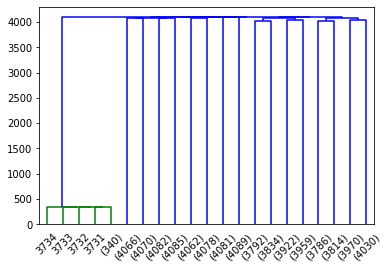

time: 279 ms


In [28]:
plot_dendrogram(modelf,p=4, truncate_mode='level')

In [29]:
from sklearn.cluster import AffinityPropagation

time: 2.01 ms


In [30]:
affprop = AffinityPropagation(affinity='precomputed')

time: 1.77 ms


In [31]:
affprop.fit_predict(distances4096)

/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)
/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:244: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


array([-1, -1, -1, ..., -1, -1, -1])

time: 47.3 s


In [32]:
affprop.labels_

array([-1, -1, -1, ..., -1, -1, -1])

time: 9.37 ms


In [33]:
from sklearn.cluster import DBSCAN

time: 842 µs


In [34]:
dbscan = DBSCAN(metric='precomputed')

time: 2.13 ms


In [35]:
dbscan.fit_predict(distances4096)

array([0, 0, 0, ..., 0, 0, 0])

time: 312 ms


In [36]:
np.max(dbscan.labels_)

1

time: 11.5 ms


In [37]:
from sklearn.cluster import OPTICS

time: 500 µs


In [38]:
optics = OPTICS(metric='precomputed')

time: 4.67 ms


In [39]:
optics.fit_predict(distances4096)

/home/simone/anaconda3/envs/gc/lib/python3.7/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([-1, -1, -1, ...,  2, -1, -1])

time: 36.5 s


In [40]:
labelso = optics.labels_

time: 675 µs


In [41]:
dic = collections.Counter(labelso)

for keys in dic.keys():
    print(keys,':', dic[keys])

-1 : 3467
33 : 10
35 : 11
37 : 7
39 : 5
23 : 6
38 : 5
31 : 6
24 : 8
36 : 6
34 : 8
18 : 7
22 : 5
30 : 14
8 : 8
27 : 9
25 : 7
0 : 8
26 : 5
21 : 10
32 : 5
17 : 7
29 : 8
28 : 5
11 : 5
19 : 5
12 : 11
9 : 7
15 : 7
16 : 5
13 : 20
20 : 5
14 : 5
6 : 6
1 : 5
10 : 6
5 : 7
2 : 21
7 : 7
4 : 5
40 : 323
3 : 9
time: 6.83 ms
